In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(0)
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['font.size'] = 13

In [2]:
N_train = 400
N_test = 400
n = int(N_train/2)
ntest=int(N_test/2)
noise = 50
male_avg = np.asarray([70,170])
male_std = np.asarray([7,10])

female_avg = np.asarray([60,150])
female_std = np.asarray([5,8])

X_train = np.zeros((N_train,2))
Y_train = np.zeros((N_train))

X_test = np.zeros((N_test,2))
Y_test = np.zeros((N_test))

X_train[:n,:] = np.random.randn(n,2)*male_std+male_avg
X_train[n:,:] = np.random.randn(n,2)*female_std+female_avg
Y_train[n:] = 1

X_test[:ntest,:] = np.random.randn(ntest,2)*male_std+male_avg
X_test[ntest:,:] = np.random.randn(ntest,2)*female_std+female_avg
Y_test[ntest:] = 1

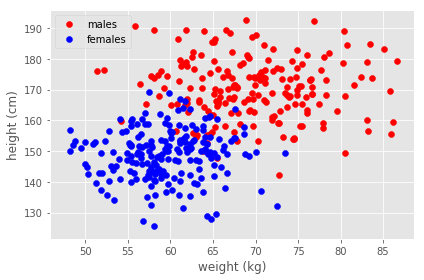

In [3]:
plt.figure()
plt.scatter(X_train[:n,0],X_train[:n,1], color='r', label='males')
plt.scatter(X_train[n:,0],X_train[n:,1], color='b', label='females')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
for j in range(10):
    i = np.random.randint(X_train.shape[0])
    print("weight = {:.2f}, height = {:.2f}, male/female={}".format(X_train[i,0], 
                                                X_train[i,1], Y_train[i]))

weight = 58.69, height = 148.54, male/female=1.0
weight = 74.71, height = 174.07, male/female=0.0
weight = 63.60, height = 141.18, male/female=1.0
weight = 58.26, height = 145.35, male/female=1.0
weight = 86.68, height = 179.44, male/female=0.0
weight = 61.42, height = 163.94, male/female=1.0
weight = 55.71, height = 142.81, male/female=1.0
weight = 63.60, height = 141.18, male/female=1.0
weight = 65.83, height = 169.47, male/female=0.0
weight = 57.41, height = 142.17, male/female=1.0


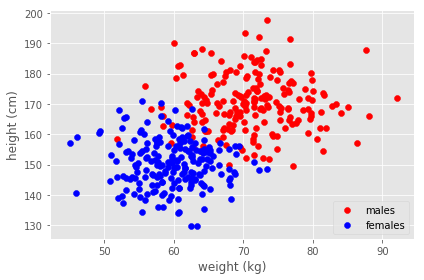

In [5]:
plt.figure()
plt.scatter(X_test[:ntest,0],X_test[:ntest,1], color='r', label='males')
plt.scatter(X_test[ntest:,0],X_test[ntest:,1], color='b', label='females')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [6]:
mu = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

X_train = (X_train-mu)/std
X_test = (X_test-mu)/std

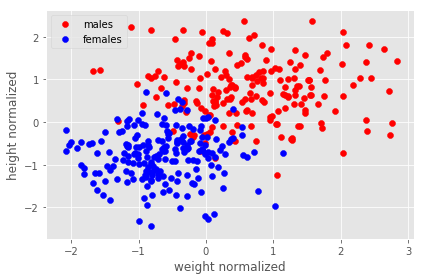

In [7]:
plt.figure()
plt.scatter(X_train[:n,0],X_train[:n,1], color='r', label='males')
plt.scatter(X_train[n:,0],X_train[n:,1], color='b', label='females')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def classify(x,theta,b):
    a = np.sum(x*theta,axis=1)+b
    return sigmoid(a)

def binaryCrossEntropy(y,x,theta,b,model,lam=0.0):
    eps = 1e-5
    yhat = model(x,theta,b)
    l = np.mean(-(1-y)*np.log((1-yhat+eps)) - y*np.log(yhat+eps)) +\
        lam*np.sum(theta**2)
    return l

def gradient(y,x,theta,b,model,lam=0.0):
    eps=1e-5
    yhat = model(x,theta,b)
    temp = (yhat-y)
    temp = temp[:,np.newaxis]
    
    dtheta= np.mean(temp*x,axis=0) +2*lam*theta
    db= np.mean(temp)
    return dtheta,db

def gradient_descent(Theta,b,X_train,Y_train,X_test,Y_test,loss,gradient,model,
                     N_iterations=1000,print_every=100,learning_rate=1e-3,lam=0.0):
    train_loss = []
    test_loss = []
    iters = []
    thetas = []
    biases = []
    for i in range(N_iterations):
            dtheta,db = gradient(Y_train,X_train,Theta,b,model,lam)
            
            for j in range(len(Theta)):
                Theta[j] -= learning_rate*dtheta[j]
            b -= learning_rate*db

            if (i+1)%print_every == 0:
                e = loss(Y_train,X_train,Theta,b,model,lam)
                train_loss.append(e)

                e_test = loss(Y_test,X_test,Theta,b,model,lam)
                test_loss.append(e_test)

                iters.append(i)
                thetas.append(Theta.copy())
                biases.append(b)
                print("Iteration {}: Theta={}, b={:.2f}, loss_train = {:.2f},\
                    loss_test = {:.2f}".format(i,Theta,b,e,e_test))
                
    thetas = np.asarray(thetas)
    
    return Theta,b,thetas,biases,train_loss,test_loss,iters

In [9]:
learning_rate = 5e-3
N_iterations = 10000
Theta = np.asarray([1.0,1.0])
b = 1.0
print_every = 200
train_loss = []
test_loss = []
iters = []
thetas = []
biases = []
Theta,b,thetas,biases,train_loss,test_loss,iters = gradient_descent(Theta,b,X_train,Y_train,X_test,Y_test,
        binaryCrossEntropy,gradient,classify, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate)

Iteration 199: Theta=[0.49795562 0.43216042], b=0.84, loss_train = 1.17,                    loss_test = 1.19
Iteration 399: Theta=[ 0.09977187 -0.01815396], b=0.67, loss_train = 0.77,                    loss_test = 0.78
Iteration 599: Theta=[-0.18710561 -0.3492767 ], b=0.52, loss_train = 0.56,                    loss_test = 0.56
Iteration 799: Theta=[-0.38987934 -0.59215138], b=0.42, loss_train = 0.45,                    loss_test = 0.44
Iteration 999: Theta=[-0.54046537 -0.77935638], b=0.34, loss_train = 0.38,                    loss_test = 0.37
Iteration 1199: Theta=[-0.6586868  -0.93105439], b=0.28, loss_train = 0.34,                    loss_test = 0.33
Iteration 1399: Theta=[-0.75557684 -1.05869476], b=0.23, loss_train = 0.31,                    loss_test = 0.30
Iteration 1599: Theta=[-0.8375336  -1.16907036], b=0.19, loss_train = 0.29,                    loss_test = 0.28
Iteration 1799: Theta=[-0.90850975 -1.26646764], b=0.16, loss_train = 0.28,                    loss_test = 0.27

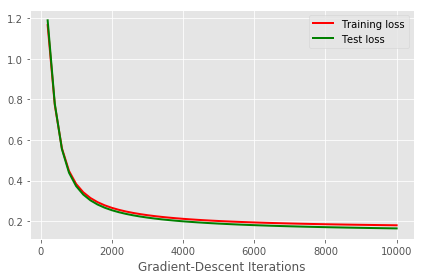

In [10]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.tight_layout()
plt.show()

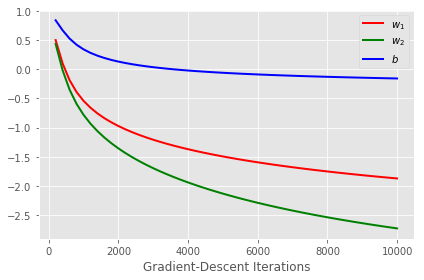

In [12]:
thetas = np.asarray(thetas)
biases = np.asarray(biases)

plt.plot(iters,thetas[:,0],linewidth=2,color='r',label=r'$w_1$')
plt.plot(iters,thetas[:,1],linewidth=2,color='g',label=r'$w_2$')
plt.plot(iters,biases[:],linewidth=2,color='b',label=r'$b$')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
train_line = (-b-Theta[0]*X_train[:,0])/Theta[1]

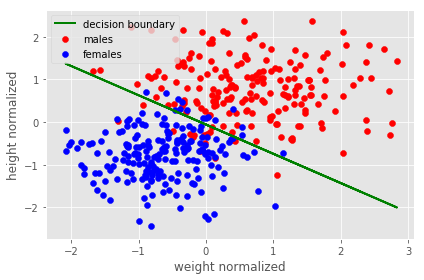

In [15]:
plt.figure()
plt.scatter(X_train[:n,0],X_train[:n,1], color='r', label='males')
plt.scatter(X_train[n:,0],X_train[n:,1], color='b', label='females')
plt.plot(X_train[:,0],train_line,color='g',linewidth=2,label='decision boundary')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
test_line = (-b-Theta[0]*X_test[:,0])/Theta[1]

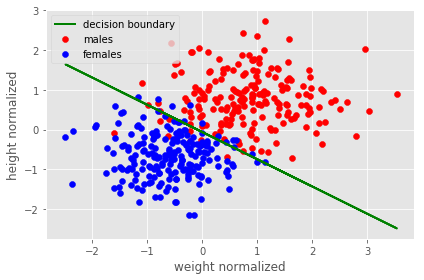

In [19]:
plt.figure()
plt.scatter(X_test[:ntest,0],X_test[:ntest,1], color='r', label='males')
plt.scatter(X_test[ntest:,0],X_test[ntest:,1], color='b', label='females')
plt.plot(X_test[:,0],test_line,color='g',linewidth=2,label='decision boundary')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
ypred = sigmoid(np.sum(Theta*X_test,axis=1)+b)
ythresh = ypred.copy()
ythresh[ythresh>0.5] = 1
ythresh[ythresh<=0.5] = 0
accuracy = np.mean((ythresh.astype(int)==Y_test.astype(int)))
print("Test accuracy = {}%".format(accuracy*100))

Test accuracy = 94.25%


In [22]:
num_positives = np.sum(Y_test)
num_negatives = np.sum(1-Y_test)
TP = np.sum(Y_test*ythresh)/num_positives
TN = np.sum((1-Y_test)*(1-ythresh))/num_negatives
FP = np.sum((1-Y_test)*ythresh)/num_positives
FN = np.sum((1-ythresh)*Y_test)/num_negatives

print("True positive rate ={}".format(TP))
print("True negative rate ={}".format(TN))
print("False positive rate ={}".format(FP))
print("False negative rate ={}".format(FN))

True positive rate =0.935
True negative rate =0.95
False positive rate =0.05
False negative rate =0.065


In [23]:
def recall(y,yhat):
    TP = np.sum(y*yhat)
    FN = np.sum((1-yhat)*y)

    return float(TP)/(FN+TP)

def precision(y,yhat):
    FP = np.sum(yhat*(1-y))
    TP = np.sum(yhat*y)

    return float(TP)/(FP+TP)

In [24]:
precisions = []
recalls = []
for i in np.arange(0,1.0,0.001):
    yhat = ypred.copy()
    yhat[yhat>i] = 1.0
    yhat[yhat<=i] = 0.0
    p = precision(Y_test,yhat)
    r = recall(Y_test,yhat)
    
    precisions.append(p)
    recalls.append(r)

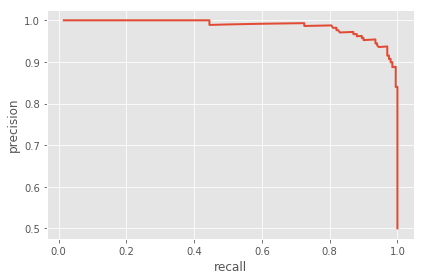

In [25]:
plt.figure()
plt.plot(recalls,precisions,linewidth=2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.tight_layout()
plt.show()